In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("BASELINE.csv")
df2 = pd.read_csv("NET_LOSS.csv")

df1["source"] = "BASELINE"
df2["source"] = "NET LOSS"

df1["Time"] = pd.to_datetime(df1["Time"])
df2["Time"] = pd.to_datetime(df2["Time"])

offset = df1["Time"].min() - df2["Time"].min()
df2["Time"] = df2["Time"] + offset

df1["Time"] = (df1["Time"] - df1["Time"].min()).dt.total_seconds() / 60
df2["Time"] = (df2["Time"] - df2["Time"].min()).dt.total_seconds() / 60

delay1 = 600 / 60  
delay2 = 1800 / 60 
duration = 600 / 60 

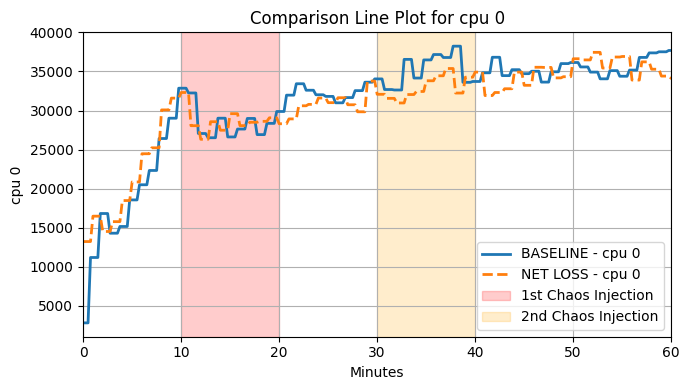

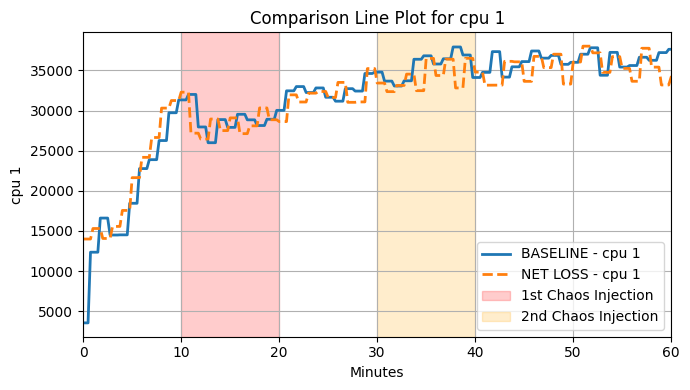

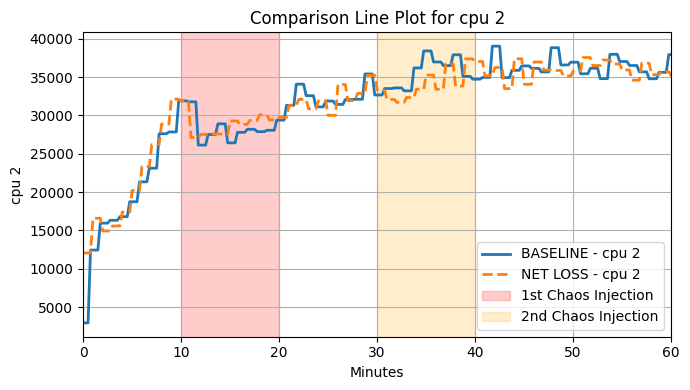

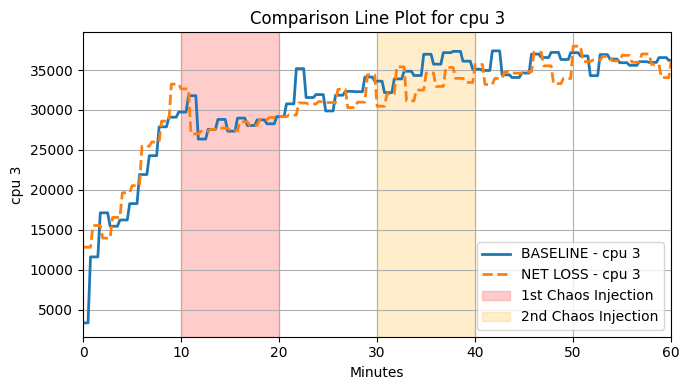

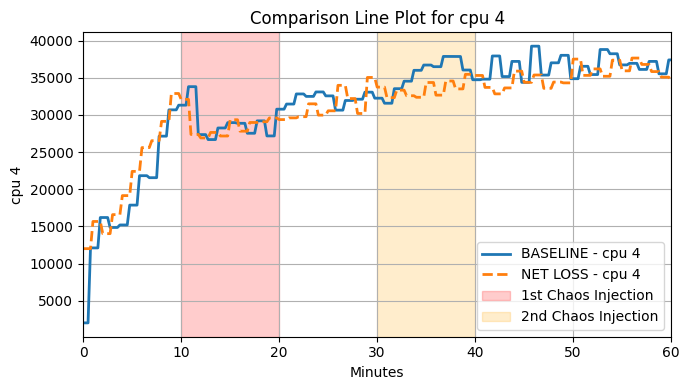

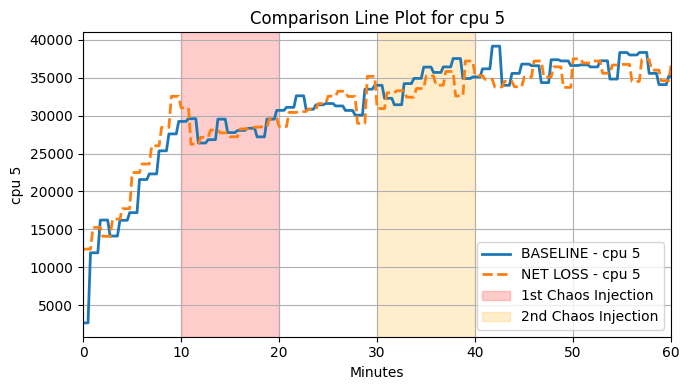

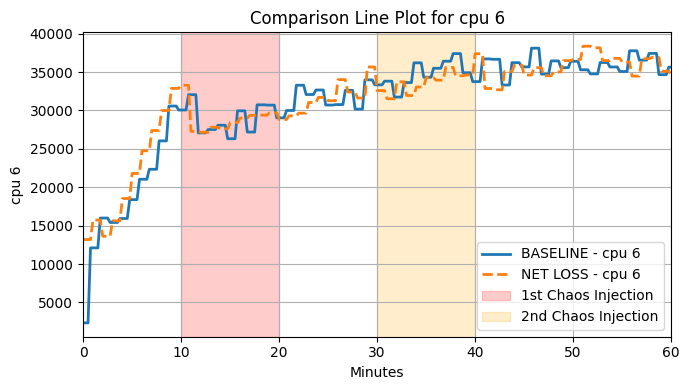

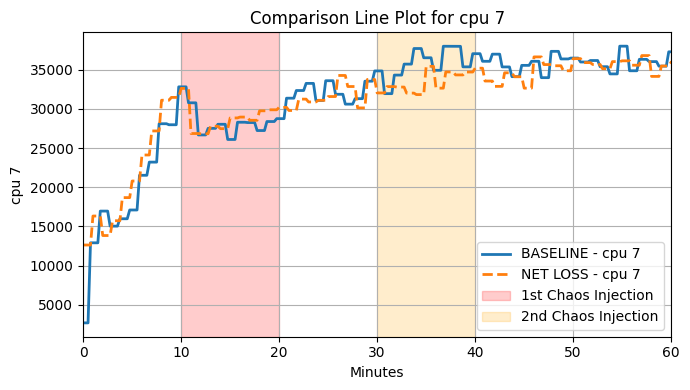

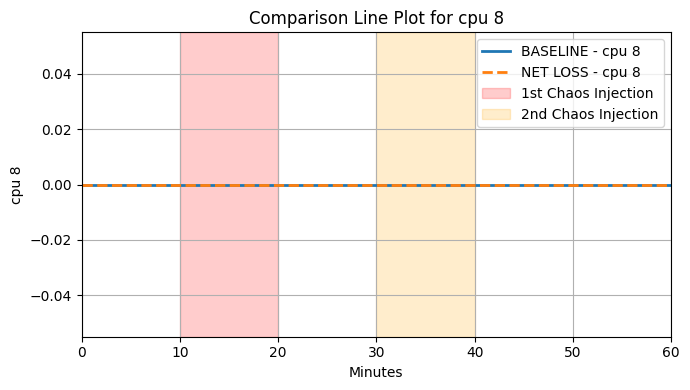

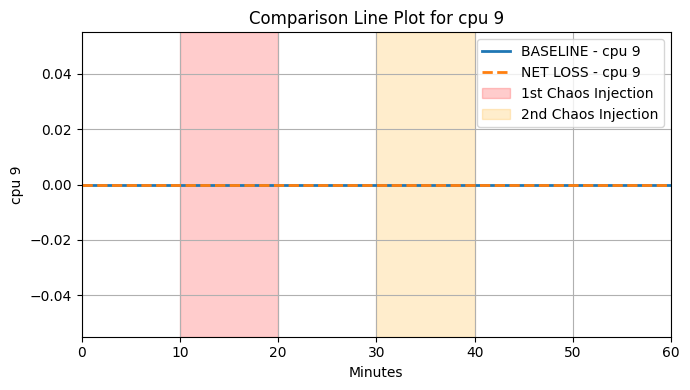

In [11]:
columns = ["cpu 0","cpu 1","cpu 2","cpu 3","cpu 4","cpu 5","cpu 6","cpu 7","cpu 8","cpu 9"] 

for column in columns:
    plt.figure(figsize=(7, 4))
    
    plt.plot(df1["Time"], df1[column], label=f"BASELINE - {column}", linewidth=2)
    plt.plot(df2["Time"], df2[column], label=f"NET LOSS - {column}", linewidth=2, linestyle='--')
    
    plt.axvspan(delay1, delay1 + duration, color='red', alpha=0.2, label="1st Chaos Injection")
    plt.axvspan(delay2, delay2 + duration, color='orange', alpha=0.2, label="2nd Chaos Injection")
    
    plt.xlabel("Minutes")
    plt.ylabel(column)  
    plt.title(f"Comparison Line Plot for {column}")
    plt.xlim(0, 60)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


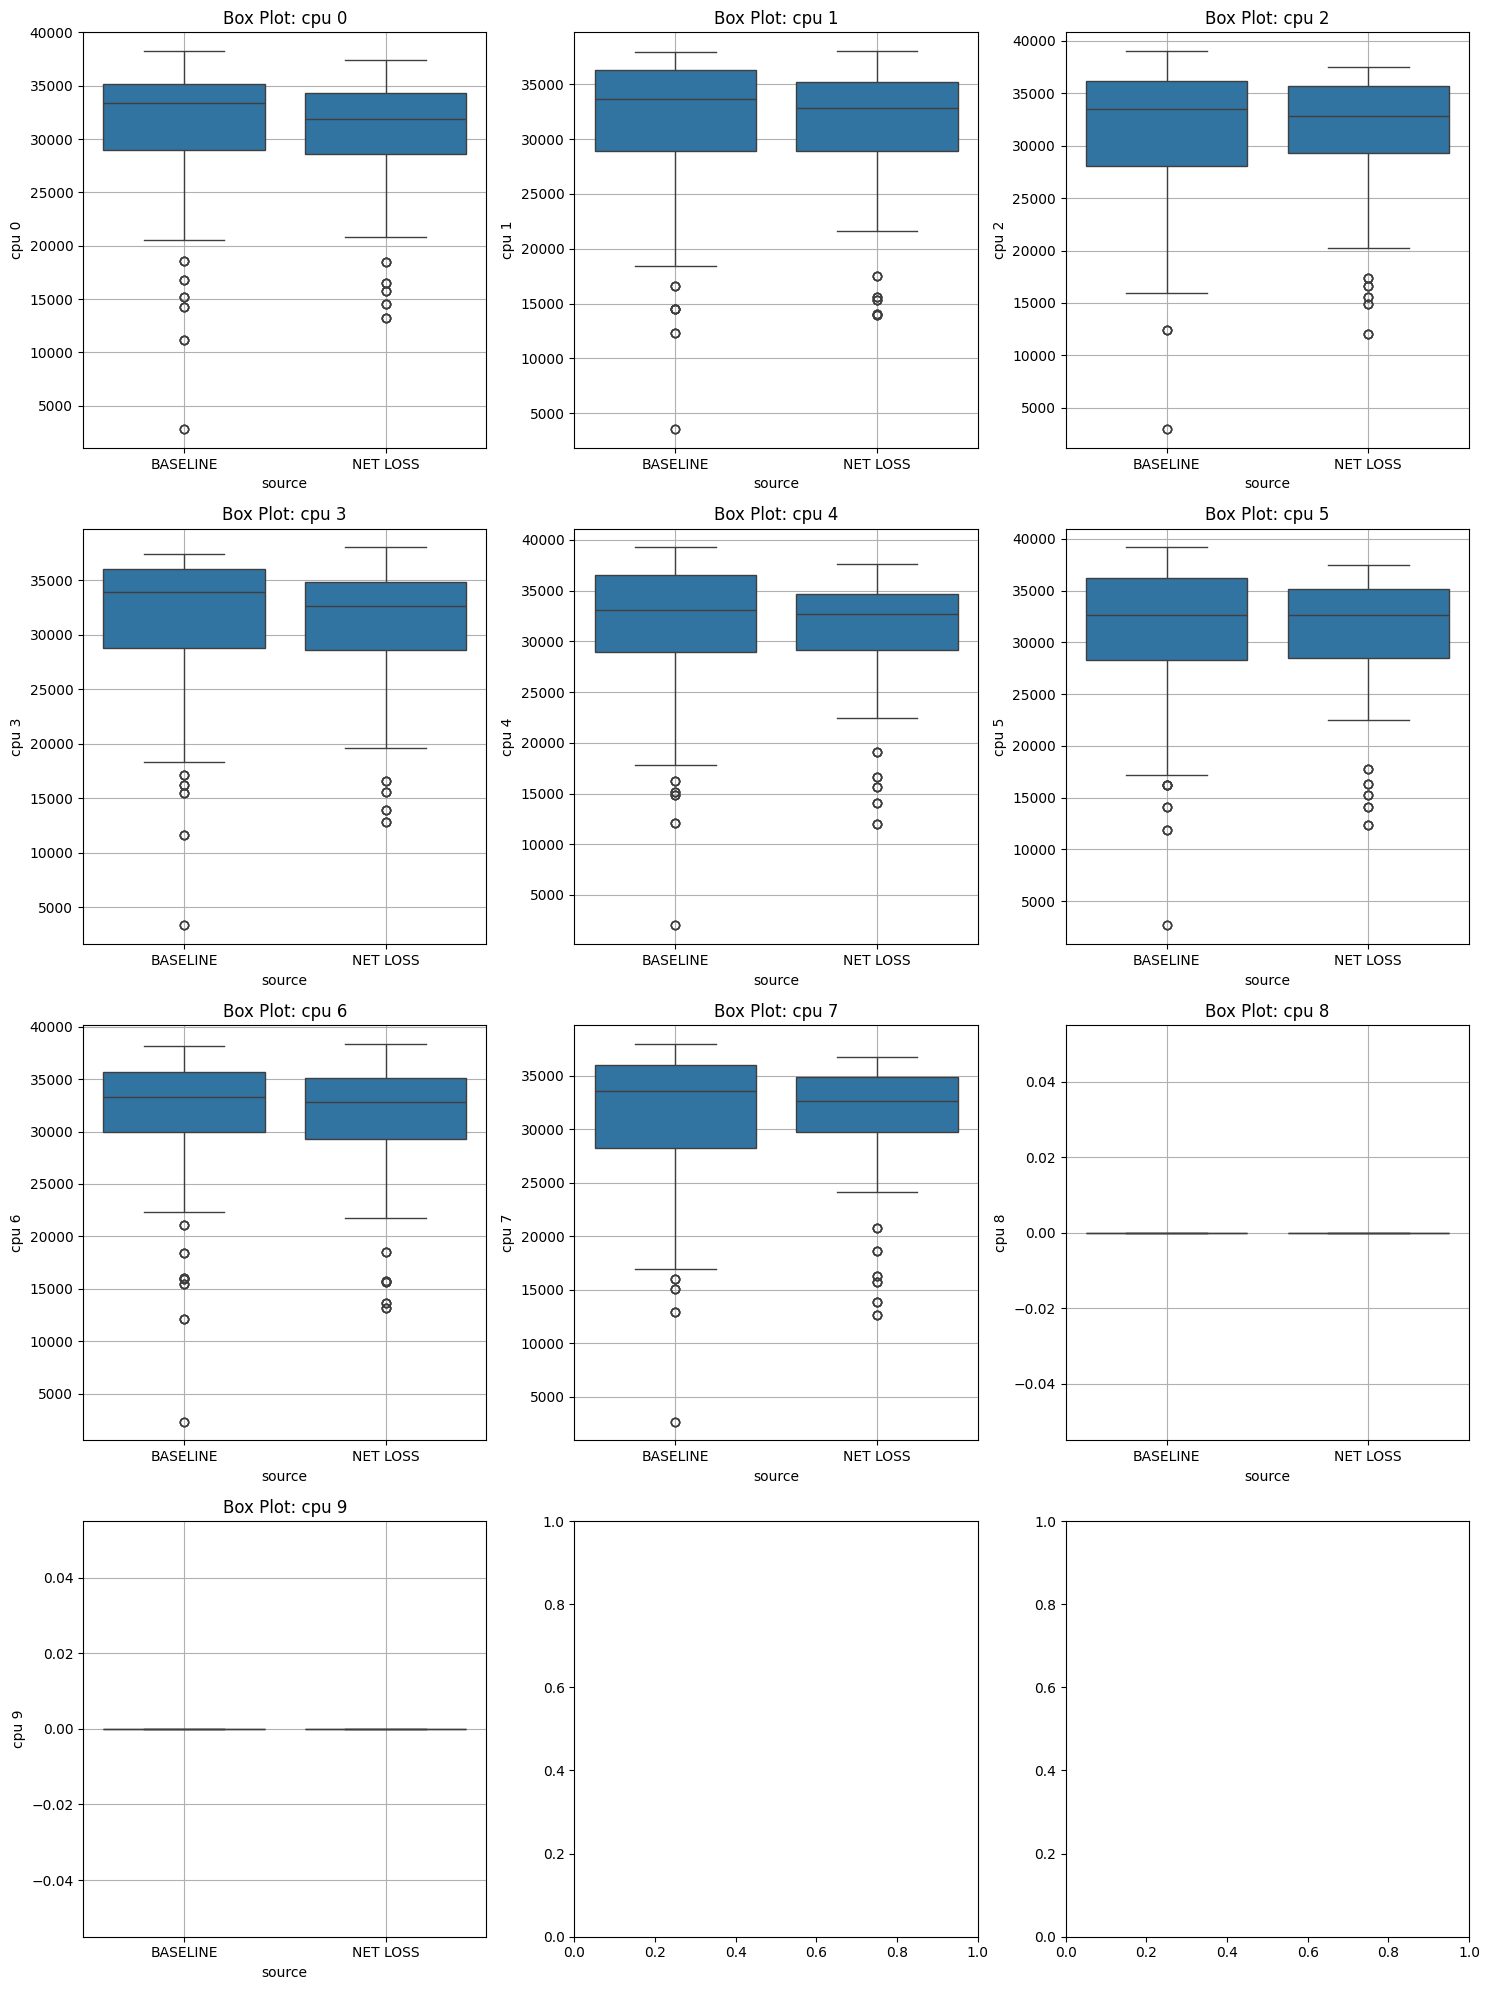

In [12]:
df1["source"] = "BASELINE"
df2["source"] = "NET LOSS"
combined = pd.concat([df1, df2])

numeric_columns = [column for column in combined.columns if column != "Time" and column != "source"]

n_cols = 3  
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x="source", y=column, data=combined, ax=axes[i])
    axes[i].set_title(f"Box Plot: {column}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


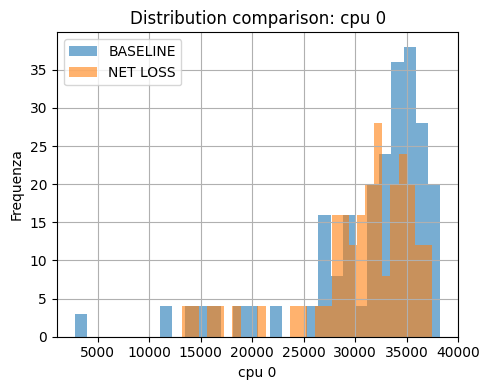

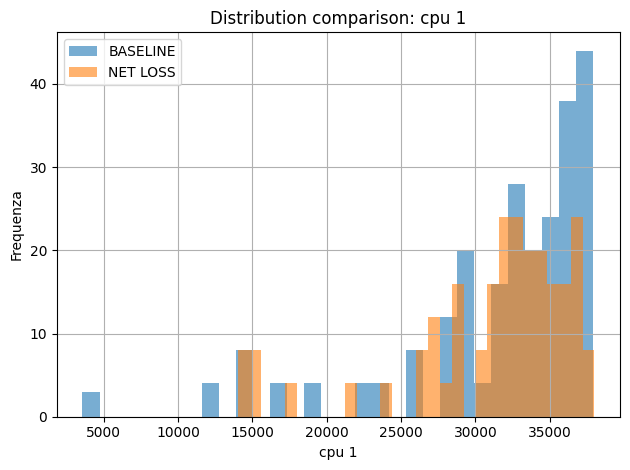

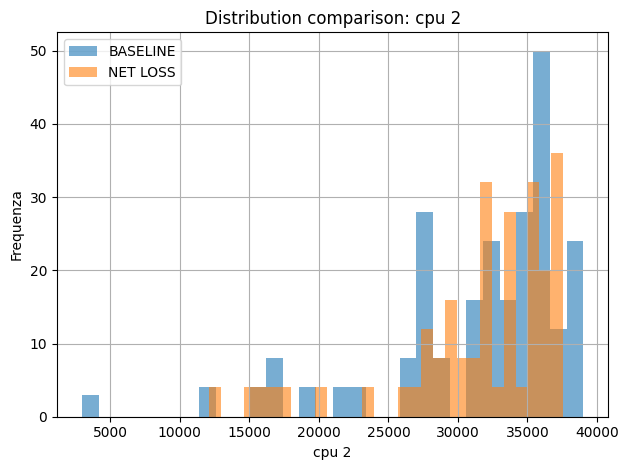

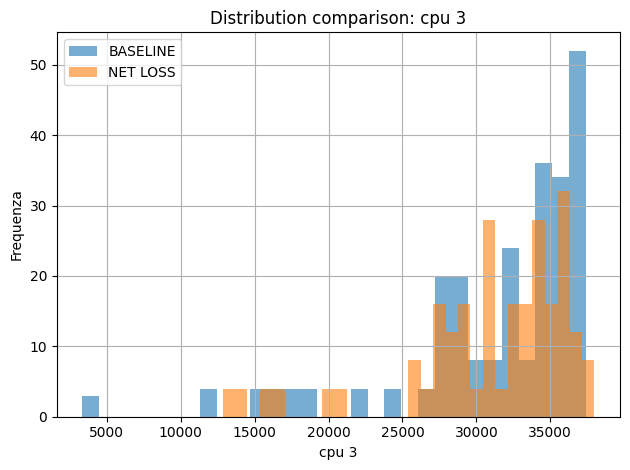

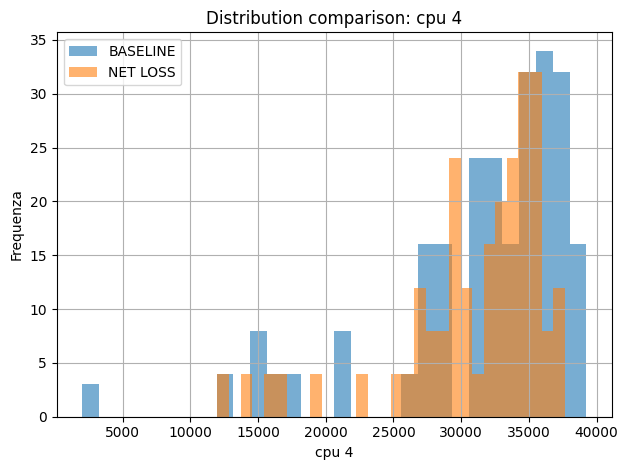

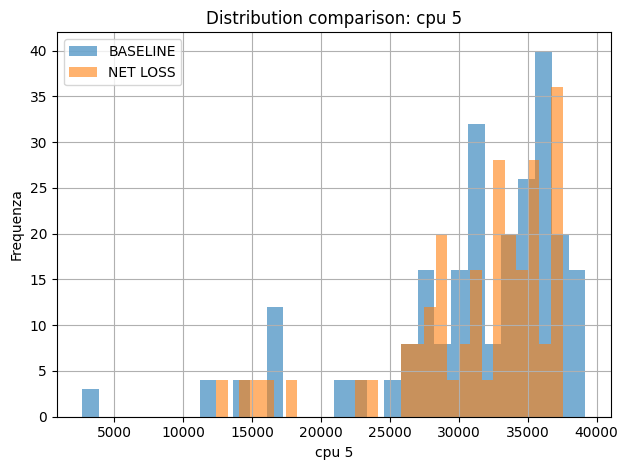

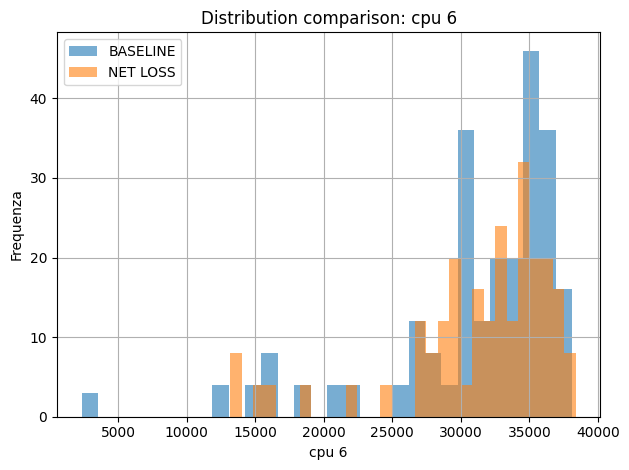

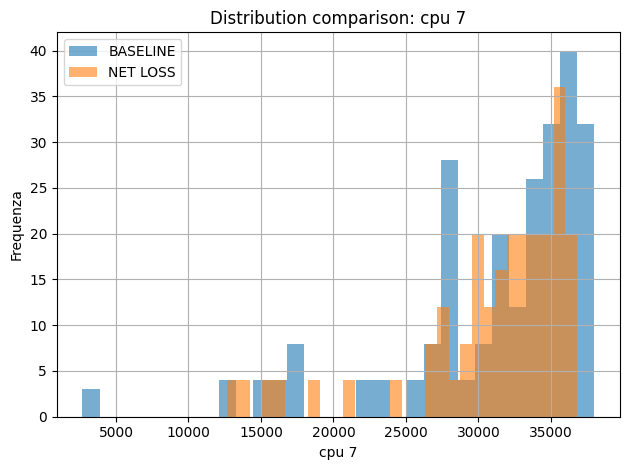

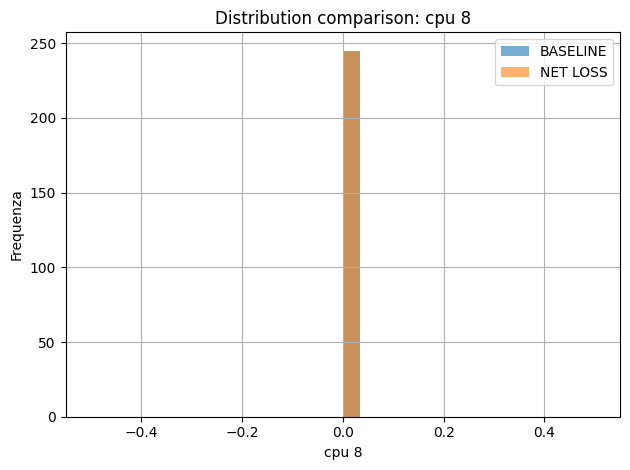

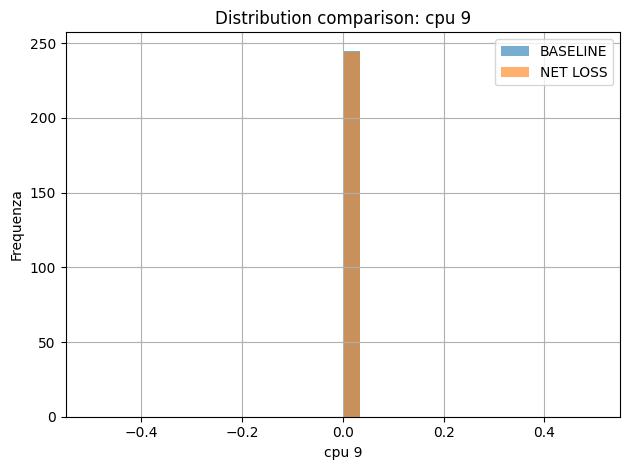

In [13]:
plt.figure(figsize=(5, 4))

numeric_columns = [column for column in combined.columns if column != "Time" and column != "source"]
for col in numeric_columns: 
    plt.hist(df1[col], bins=30, alpha=0.6, label="BASELINE")
    plt.hist(df2[col], bins=30, alpha=0.6, label="NET LOSS")
    plt.xlabel(col)  
    plt.ylabel("Frequenza")
    plt.title(f"Distribution comparison: {col}")  # Usa il nome della colonna nel titolo
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

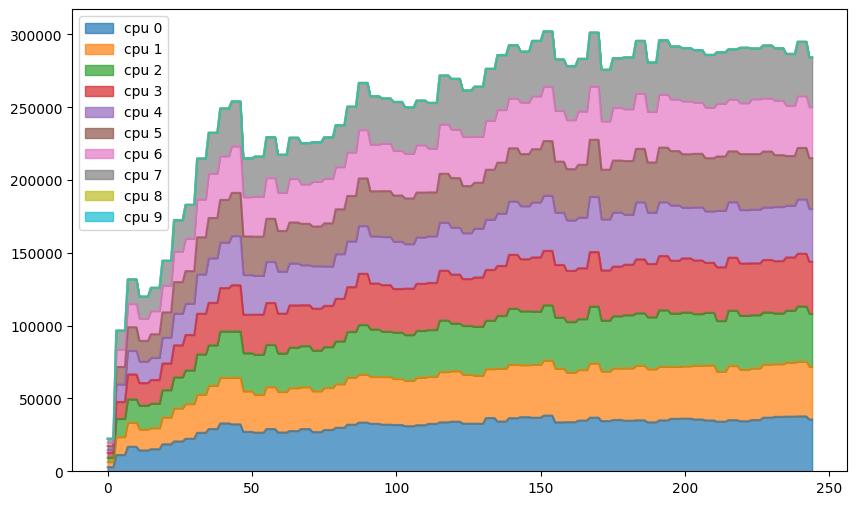

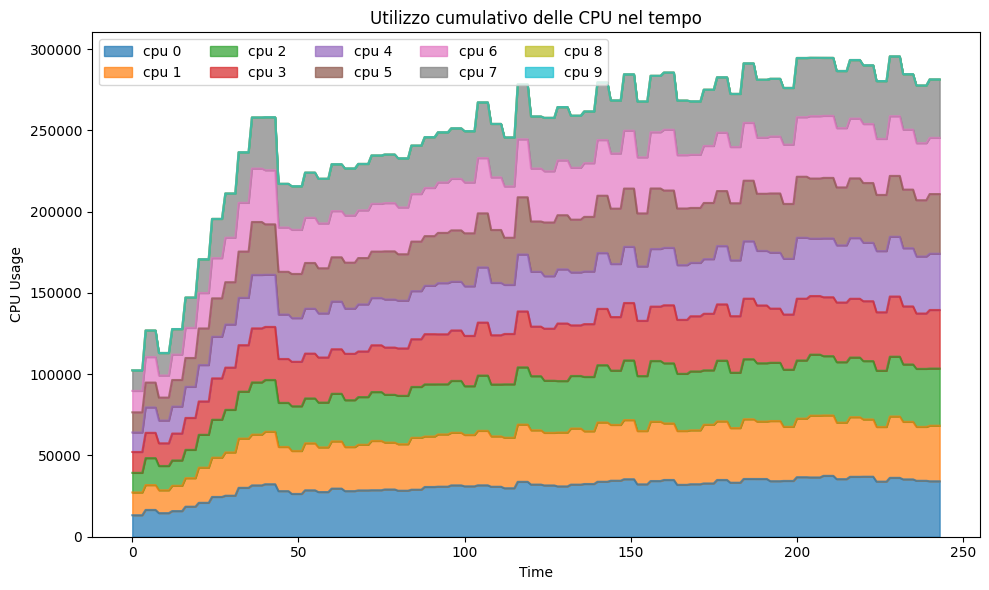

In [14]:
df_cpus1 = df1.drop(columns='Time')
df_cpus2 = df2.drop(columns='Time')

df_cpus1.plot.area(stacked=True, figsize=(10, 6), alpha=0.7)
df_cpus2.plot.area(stacked=True, figsize=(10, 6), alpha=0.7)

plt.title('Utilizzo cumulativo delle CPU nel tempo')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend(loc='upper left', ncol=5)
plt.tight_layout()
plt.show()